In [40]:
import pandas as pd
# pd.set_option('max_colwidth', 50)
# set this if you need to

The Health Department has developed an inspection report and scoring system. 
After conducting an inspection of the facility, the Health Inspector calculates a score based on the violations observed. 
Violations can fall into:
- **high risk category**: records specific violations that directly relate to the transmission of food borne illnesses,the adulteration of food products and the contamination of food-contact surfaces.
- **moderate risk category**: records specific violations that are of a moderate risk to the public health and safety.
- **low risk category**: records violations that are low risk or have no immediate risk to the public health and safety.

In [41]:
businesses = pd.read_csv('./data/businesses_plus.csv', parse_dates=True, dtype={'phone_number': str})
businesses.head()
# dtype casts the column as a specific data type

,business_id,name,address,city,postal_code,latitude,longitude,phone_number,TaxCode,business_certificate,application_date,owner_name,owner_address,owner_city,owner_state,owner_zip
0,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
1,19,Nrgize Lifestyle Cafe,"1200 Van Ness Ave, 3rd Floor",San Francisco,94109,37.786848,-122.421547,NaN,H24,NaN,NaN,24 Hour Fitness Inc,"1200 Van Ness Ave, 3rd Floor",San Francisco,CA,94109
2,24,OMNI S.F. Hotel - 2nd Floor Pantry,"500 California St, 2nd Floor",San Francisco,94104,37.792888,-122.403135,NaN,H24,352312,NaN,OMNI San Francisco Hotel Corp,"500 California St, 2nd Floor",San Francisco,CA,94104
3,31,Norman's Ice Cream and Freezes,2801 Leavenworth St,San Francisco,94133,37.807155,-122.419004,NaN,H24,346882,NaN,Norman Antiforda,2801 Leavenworth St,San Francisco,CA,94133
4,45,CHARLIE'S DELI CAFE,3202 FOLSOM St,S.F.,94110,37.747114,-122.413641,NaN,H24,340024,10/10/2001,"HARB, CHARLES AND KRISTIN",1150 SANCHEZ,S.F.,CA,94114


In [42]:
inspections = pd.read_csv('./data/inspections_plus.csv', parse_dates=True)
inspections.head()

,business_id,Score,date,type
0,10,NaN,20140807,Reinspection/Followup
1,10,94,20140729,Routine - Unscheduled
2,10,NaN,20140124,Reinspection/Followup
3,10,92,20140114,Routine - Unscheduled
4,19,94,20141110,Routine - Unscheduled


In [43]:
violations = pd.read_csv('./data/violations_plus.csv', parse_dates=True)
violations.head()

,business_id,date,ViolationTypeID,risk_category,description
0,10,20140114,103154,Low Risk,Unclean or degraded floors walls or ceilings
1,10,20140114,103119,Moderate Risk,Inadequate and inaccessible handwashing facili...
2,10,20140114,103145,Low Risk,Improper storage of equipment utensils or linens
3,10,20140729,103129,Moderate Risk,Insufficient hot water or running water
4,10,20140729,103144,Low Risk,Unapproved or unmaintained equipment or utensils


In [62]:
# 1 Combine the three dataframes into one data frame called restaurant_scores
# Hint: http://pandas.pydata.org/pandas-docs/stable/merging.html
restaurant_scores = pd.merge(businesses, inspections, on = "business_id" )
restaurant_scores=pd.merge(restaurant_scores, violations, on = "business_id" )
restaurant_scores.head()


,business_id,name,address,city,postal_code,latitude,longitude,phone_number,TaxCode,business_certificate,...,owner_state,owner_zip,Score,date_x,type,month,date_y,ViolationTypeID,risk_category,description
5,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059,...,CA,94104,94,20140729,Routine - Unscheduled,7,20140114,103154,Low Risk,Unclean or degraded floors walls or ceilings
6,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059,...,CA,94104,94,20140729,Routine - Unscheduled,7,20140114,103119,Moderate Risk,Inadequate and inaccessible handwashing facili...
7,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059,...,CA,94104,94,20140729,Routine - Unscheduled,7,20140114,103145,Low Risk,Improper storage of equipment utensils or linens
8,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059,...,CA,94104,94,20140729,Routine - Unscheduled,7,20140729,103129,Moderate Risk,Insufficient hot water or running water
9,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059,...,CA,94104,94,20140729,Routine - Unscheduled,7,20140729,103144,Low Risk,Unapproved or unmaintained equipment or utensils


In [45]:
# 2 Which ten business have had the most inspections?

inspections.business_id.value_counts().head(10)

1775     21
74374    20
2505     20
71618    19
74131    19
67154    19
71804    19
489      18
7747     18
65523    17
Name: business_id, dtype: int64

In [46]:
# 3 Group and count the inspections by type
inspections.type.value_counts()

Routine - Unscheduled                15481
Reinspection/Followup                 5386
New Ownership                         1877
Complaint                             1634
New Construction                      1613
Non-inspection site visit              840
Complaint Reinspection/Followup        163
Structural Inspection                  120
Foodborne Illness Investigation        100
Routine - Scheduled                     63
Administrative or Document Review        4
Special Event                            2
Multi-agency Investigation               2
Name: type, dtype: int64

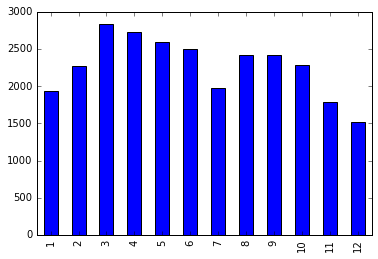

In [47]:
# 4 Create a plot that shows number of inspections per month
# Bonus for creating a heatmap
# http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html?highlight=heatmap
%matplotlib inline

import matplotlib.pyplot as plt
plt.figure()
inspections['month'] =  pd.to_datetime(inspections['date'],format="%Y%m%d").dt.month
inspections['month'].value_counts(sort=False).plot(kind='bar')

plt.show()


In [48]:
# 5 Which zip code contains the most high risk violations?

restaurant_scores[restaurant_scores.risk_category == "High Risk"].owner_zip.value_counts().head(1)

94133    2997
Name: owner_zip, dtype: int64

In [49]:
# 6 If inspection is prompted by a change in restaurant ownership, 
# is the inspection more likely to be categorized as higher or lower risk?

restaurant_scores[restaurant_scores.type == "New Ownership"].risk_category.value_counts().head(1)



Low Risk    4431
Name: risk_category, dtype: int64

In [50]:
# 7 Examining the descriptions, what is the most common violation?
violations.description.value_counts().head(1)

Unclean or degraded floors walls or ceilings    3395
Name: description, dtype: int64

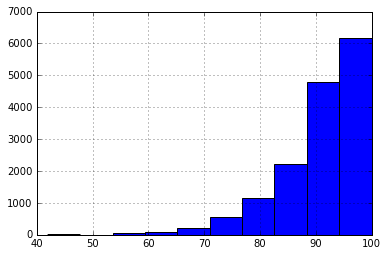

In [51]:
# 8 Create a hist of the scores with 10 bins
inspections.Score.hist(bins=10)

In [65]:
# 9 Can you predict risk category based on the other features in this dataset?
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
import numpy as np
dumms = pd.get_dummies(restaurant_scores.postal_code)
restaurant_scores = pd.concat([restaurant_scores,dumms],axis = 1)
restaurant_scores = restaurant_scores[restaurant_scores['Score'].notnull()]
y = restaurant_scores.risk_category
X = restaurant_scores[['date_x','Score','ViolationTypeID' ]]
#print restaurant_scores[restaurant_scores.isnull()].head()
print "5"
knn = KNeighborsClassifier()
k_range = range(1, 30, 2)
param_grid = dict(n_neighbors=k_range)
knn = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print np.mean(scores) 
print "5"

5
0.987117051212
5


In [ ]:
# 10 Extra Credit:
# Use Instagram location API to find pictures taken at the lat, long of the most High Risk restaurant
# https://www.instagram.com/developer/endpoints/locations/

In [ ]:
############################
### A Little More Morbid ###
############################

In [62]:
killings = pd.read_csv('./data/police-killings.csv')
killings.head()

,Unnamed: 0,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,lawenforcementagency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


In [75]:
# 1. Make the following changed to column names:
# lawenforcementagency -> agency
# raceethnicity        -> race

killings.rename(columns={'lawenforcementagency': 'agency', 'raceethnicity': 'race'}, inplace=True)
killings.columns

Index([u'Unnamed: 0', u'name', u'age', u'gender', u'race', u'month', u'day',
       u'year', u'streetaddress', u'city', u'state', u'agency', u'cause',
       u'armed', u'county_income'],
      dtype='object')

In [84]:
# 2. Show the count of missing values in each column
for i in killings.columns:
    print i + "  " +str(len(killings[killings[i].isnull()]))


Unnamed: 0  0
name  0
age  0
gender  0
race  0
month  0
day  0
year  0
streetaddress  4
city  0
state  0
agency  0
cause  0
armed  0
county_income  0


In [88]:
# 3. replace each null value in the dataframe with the string "Unknown"
killings = killings.fillna(value="Unknown")
killings[killings.streetaddress.isnull()]

,Unnamed: 0,name,age,gender,race,month,day,year,streetaddress,city,state,agency,cause,armed,county_income


In [93]:
# 4. How many killings were there so far in 2015?
print len(killings)

467


In [91]:
# 5. Of all killings, how many were male and how many female?
killings.gender.value_counts()

Male      445
Female     22
dtype: int64

In [95]:
# 6. How many killings were of unarmed people?
len(killings[killings.armed == "No"])

102

In [100]:
# 7. What percentage of all killings were unarmed?
a =len(killings[killings.armed == "No"])
b = len(killings)
print a/float(b)

0.218415417559


In [102]:
# 8. What are the 5 states with the most killings?
killings.state.value_counts().head(5)

CA    74
TX    46
FL    29
AZ    25
OK    22
dtype: int64

In [103]:
# 9. Show a value counts of deaths for each race
killings.race.value_counts()

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
dtype: int64

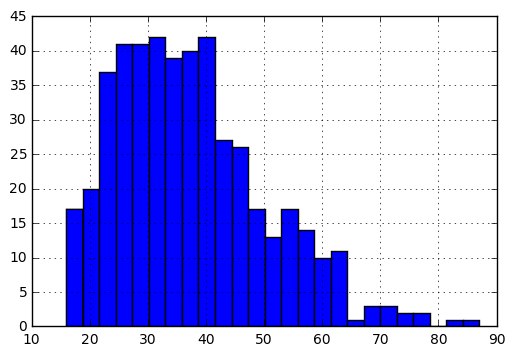

In [114]:
# 10. Display a histogram of ages of all killings
killings.age.hist(bins = 25)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000236BE390>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000029E084A8>]], dtype=object)

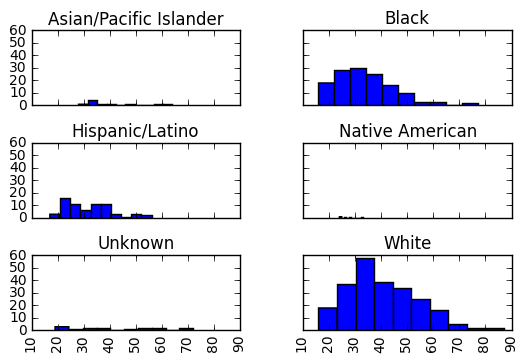

In [125]:
# 11. Show 6 histograms of ages by race
import matplotlib.pyplot as plt
fig = plt.figure()
fig.subplots_adjust(hspace=10)
killings['age'].hist(by = killings['race'], sharex=True, sharey=True)

In [126]:
# 12. What is the average age of death by race?

killings.groupby('race').age.mean()

race
Asian/Pacific Islander    40.800000
Black                     34.044444
Hispanic/Latino           31.716418
Native American           27.750000
Unknown                   43.533333
White                     40.466102
Name: age, dtype: float64

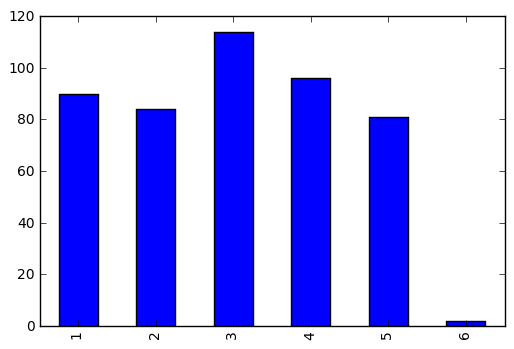

In [147]:
# 13. Show a bar chart with counts of deaths every month

#killings.month = pd.to_datetime(killings['month'],format="%B").dt.month

killings.month.value_counts(sort=False).plot(kind='bar')

In [ ]:
###################
### Less Morbid ###
###################

In [155]:
majors = pd.read_csv('./data/college-majors.csv')
majors.head()

,Unnamed: 0,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000
1,1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000
2,2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000
3,3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000
4,4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000


In [156]:
# 1. Delete the columns (employed_full_time_year_round, major_code)
majors.drop('Employed_full_time_year_round', 1,inplace=True)
majors.drop('Major_code', 1,inplace=True)

In [158]:
# 2. Show the cout of missing values in each column
for i in majors.columns:
    print i + "  " +str(len(majors[majors[i].isnull()]))

Unnamed: 0  0
Major  0
Major_category  0
Total  0
Employed  0
Unemployed  0
Unemployment_rate  0
Median  0
P25th  0
P75th  0


In [165]:
# 3. What are the top 10 highest paying majors?
majors.sort_index(by='Median',ascending = False).head(10)

,Unnamed: 0,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th
59,59,PETROLEUM ENGINEERING,Engineering,19631,14002,617,0.042205,125000,75000,210000
154,154,PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...,Health,180084,124058,4414,0.034358,106000,78000,125000
57,57,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,16094,10690,449,0.040309,97000,60000,125000
55,55,METALLURGICAL ENGINEERING,Engineering,12818,6939,326,0.044873,96000,65000,123000
58,58,NUCLEAR ENGINEERING,Engineering,9826,7320,527,0.067159,95000,65000,128000
56,56,MINING AND MINERAL ENGINEERING,Engineering,10746,7416,366,0.047032,92000,52000,124000
97,97,MATHEMATICS AND COMPUTER SCIENCE,Computers & Mathematics,7184,5874,150,0.024900,92000,53000,136000
48,48,ELECTRICAL ENGINEERING,Engineering,671647,489965,26064,0.050509,88000,60000,116000
45,45,CHEMICAL ENGINEERING,Engineering,188046,131697,6388,0.046261,86000,60000,120000
51,51,GEOLOGICAL AND GEOPHYSICAL ENGINEERING,Engineering,6264,4120,0,0.000000,85000,55000,125000


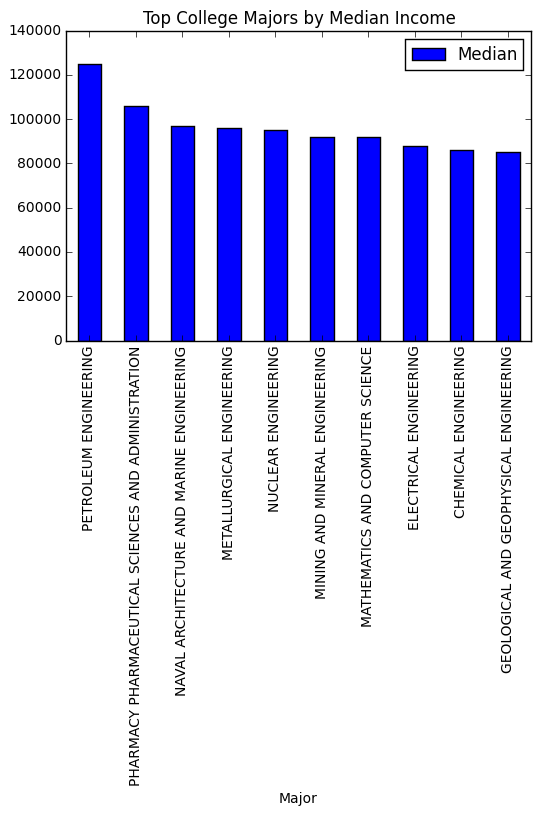

In [181]:
# 4. Plot the data from the last question in a bar chart, include proper title, and labels!

majors.sort_index(by='Median',ascending = False).head(10)[['Major', 'Median']].plot(x = 'Major',kind = 'bar', title="Top College Majors by Median Income")


In [185]:
# 5. What is the average median salary for each major category?

majors.groupby('Major_category').Median.mean()

Major_category
Agriculture & Natural Resources        55000.000000
Arts                                   43525.000000
Biology & Life Science                 50821.428571
Business                               60615.384615
Communications & Journalism            49500.000000
Computers & Mathematics                66272.727273
Education                              43831.250000
Engineering                            77758.620690
Health                                 56458.333333
Humanities & Liberal Arts              46080.000000
Industrial Arts & Consumer Services    52642.857143
Interdisciplinary                      43000.000000
Law & Public Policy                    52800.000000
Physical Sciences                      62400.000000
Psychology & Social Work               44555.555556
Social Science                         53222.222222
Name: Median, dtype: float64

In [196]:
# 6. Show only the top 5 paying major categories
majors.groupby('Major_category').Median.mean().order(ascending=False).head(5)


Major_category
Engineering                77758.620690
Computers & Mathematics    66272.727273
Physical Sciences          62400.000000
Business                   60615.384615
Health                     56458.333333
Name: Median, dtype: float64

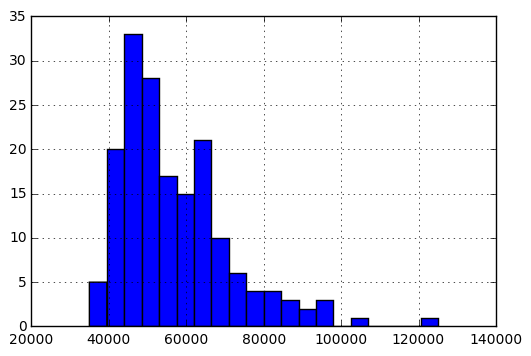

In [200]:
# 7. Plot a histogram of the distribution of median salaries
majors.Median.hist(bins =20)

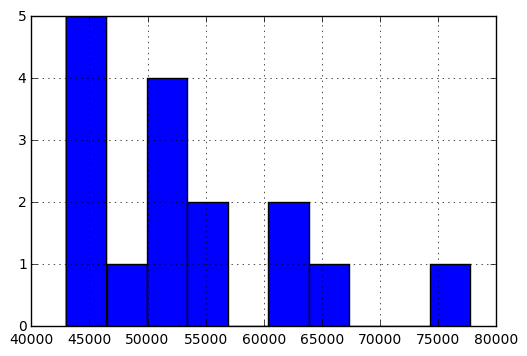

In [202]:
# 8. Plot a histogram of the distribution of median salaries by major category
majors.groupby('Major_category').Median.mean().order(ascending=False).hist(bins = 10)

In [204]:
# 9. What are the top 10 most UNemployed majors?
majors.sort_index(by='Unemployed',ascending = False)[['Major','Unemployed']].head(10)

,Major,Unemployed
161,BUSINESS MANAGEMENT AND ADMINISTRATION,147261
158,GENERAL BUSINESS,85626
114,PSYCHOLOGY,79066
159,ACCOUNTING,75379
13,COMMUNICATIONS,54390
73,ENGLISH LANGUAGE AND LITERATURE,52248
164,MARKETING AND MARKETING RESEARCH,51839
132,POLITICAL SCIENCE AND GOVERNMENT,40376
25,GENERAL EDUCATION,38742
78,BIOLOGY,36757


In [209]:
# What are the unemployment rates?

majors.sort_index(by='Unemployment_rate',ascending = False)[['Major', 'Unemployment_rate']].head(10)

,Major,Unemployment_rate
146,MISCELLANEOUS FINE ARTS,0.156147
116,CLINICAL PSYCHOLOGY,0.102712
93,MILITARY TECHNOLOGIES,0.101796
27,SCHOOL STUDENT COUNSELING,0.101746
77,LIBRARY SCIENCE,0.094843
141,VISUAL AND PERFORMING ARTS,0.094658
19,COMPUTER PROGRAMMING AND DATA PROCESSING,0.090264
119,SOCIAL PSYCHOLOGY,0.087336
104,ASTRONOMY AND ASTROPHYSICS,0.086022
11,ARCHITECTURE,0.085991


In [216]:
# 10. What are the top 10 most UNemployed majors CATEGORIES? Use the mean for each category
# What are the unemployment rates?

print str(majors.groupby('Major_category').Unemployed.mean().order(ascending=False).head(10))


print "\n\n"
print str(majors.groupby('Major_category').Unemployment_rate.mean().order(ascending=False).head(10))


Major_category
Business                       33415.153846
Communications & Journalism    25299.750000
Social Science                 14683.333333
Arts                           13015.625000
Humanities & Liberal Arts      11942.400000
Psychology & Social Work       11578.444444
Law & Public Policy             8609.800000
Education                       7833.500000
Computers & Mathematics         7270.363636
Health                          6251.083333
Name: Unemployed, dtype: float64



Major_category
Arts                                   0.087601
Psychology & Social Work               0.077867
Interdisciplinary                      0.077269
Humanities & Liberal Arts              0.069429
Communications & Journalism            0.069125
Law & Public Policy                    0.067854
Social Science                         0.065686
Computers & Mathematics                0.059437
Industrial Arts & Consumer Services    0.058546
Physical Sciences                      0.054541
Name: Unemploy

In [220]:
# 11. the total and employed column refer to the people that were surveyed.
# Create a new column showing the emlpoyment rate of the people surveyed for each major
# call it "sample_employment_rate"
# Example the first row has total: 128148 and employed: 90245. it's 
# sample_employment_rate should be 90245.0 / 128148.0 = .7042

majors["sample_employment_rate"] = majors["Employed"] / majors["Total"]
majors.head()

,Unnamed: 0,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th,sample_employment_rate
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000,0.704225
1,1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000,0.806338
2,2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000,0.775173
3,3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000,0.783948
4,4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000,0.711738


In [ ]:
# 12. Create a "sample_unemployment_rate" column
# this column should be 1 - "sample_employment_rate"

In [221]:
majors["sample_unemployment_rate"] = 1 -majors["sample_employment_rate"]
majors.head()

,Unnamed: 0,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th,sample_employment_rate,sample_unemployment_rate
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000,0.704225,0.295775
1,1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000,0.806338,0.193662
2,2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000,0.775173,0.224827
3,3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000,0.783948,0.216052
4,4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000,0.711738,0.288262
